In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import scipy.stats

In [2]:
Tmat = scipy.io.loadmat('trainecg.mat')
Tsmat= scipy.io.loadmat('testecg.mat')

In [3]:
(Tmat["healthy"]).shape


(54, 4000)

In [4]:
(Tmat["diseased"]).shape

(36, 4000)

In [6]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    res= result[3999:]
    return (pd.Series(res))
def norm(row):
    result = row/row.max()
    return result


In [7]:
dfH=pd.DataFrame(Tmat["healthy"])
df1=dfH.apply(autocorr,axis=1)
dfHN=df1.apply(norm,axis=1)

dfD=pd.DataFrame(Tmat["diseased"])
df1=dfD.apply(autocorr,axis=1)
dfDN=df1.apply(norm,axis=1)

Text(0.5, 1.02, 'Healthy vs Diseased')

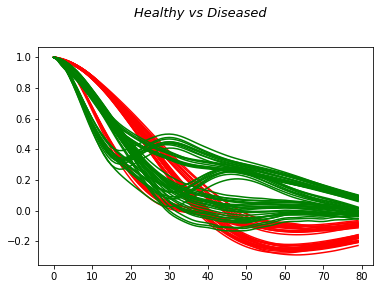

In [16]:
for i in range(0,36):
            y=dfDN.iloc[i]
            y=np.array(y).astype('float')
            y=y[0:80]

            lags=range(0,80)
            plt.plot(lags,y,color='red')
for i in range(0,54):            
            x=dfHN.iloc[i]
            x=np.array(x).astype('float')
            x=x[0:80]

            lags=range(0,80)
            plt.plot(lags,x,color='green')
plt.suptitle("Healthy vs Diseased", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)            

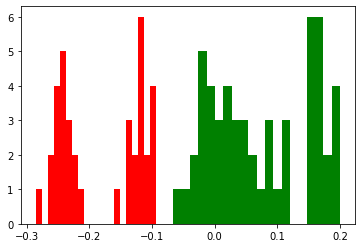

In [18]:

k=66
x = dfHN[k]
y = dfDN[k]
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=1)
n, bins, patches = plt.hist(y, num_bins, facecolor='red', alpha=1)
plt.show()

In [13]:
Ph=54/90 #priors
Pd=36/90 #priors
muH, sigmaH = x.mean(), x.std()
muD, sigmaD = y.mean(), y.std()
nH=0
for i in range(0,54):
    sD = scipy.stats.norm(muD, sigmaD).pdf(x[i])
    sH = scipy.stats.norm(muH, sigmaH).pdf(x[i])
    ph=Ph*sH/(Ph*sH+Pd*sD)
    pd=Pd*sD/(Ph*sH+Pd*sD)
    if(ph>pd):
        nH+=1
print("Accuracy : "+str(nH*100/54))

Accuracy : 100.0


In [15]:
nD=0
for i in range(0,36):
    sD = scipy.stats.norm(muD, sigmaD).pdf(y[i])
    sH = scipy.stats.norm(muH, sigmaH).pdf(y[i])
    ph=Ph*sH/(Ph*sH+Pd*sD)
    pd=Pd*sD/(Ph*sH+Pd*sD)
    if(pd>ph):
        nD+=1
        
print("Accuracy : " + str(nD*100/36))

Accuracy : 100.0


In [13]:
ssD = scipy.stats.norm(muD, sigmaD).pdf(y)
ssH = scipy.stats.norm(muD, sigmaD).pdf(x)
expD,vD=ssD.mean(),ssD.var()
expH,vH=ssH.mean(),ssH.var()
print("Expected Value of Healthy: " +str(expH))

print("Variance of Healthy: " +str(vH))

print("Expected Value of Diseased: " +str(expD))

print("Variance of Diseased: " +str(vD))

Expected Value of Healthy: 0.1078770717629081
Variance of Healthy: 0.051511887409997646
Expected Value of Diseased: 3.8791699478632387
Variance of Diseased: 0.7392923516822234


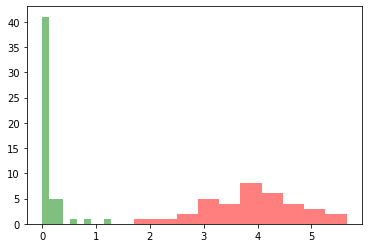

In [16]:

num_bins = 10
n, bins, patches = plt.hist(ssH, num_bins, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(ssD, num_bins, facecolor='red', alpha=0.5)
plt.show()

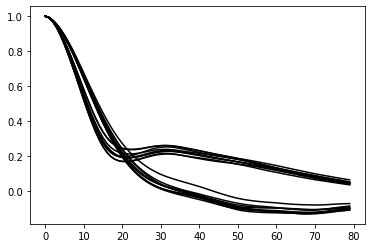

In [21]:
import numpy
import matplotlib.pyplot as plt
mylist=list()
def autocorr1(x,lags):
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)


for i in range(0,18):
    y=Tsmat["unknown"][i]
    y=np.array(y).astype('float')

    lags=range(0,80)

    for funcii, labelii in zip([autocorr1], ['healthy']):

        cii=funcii(y,lags)
        mylist.append(cii)
        plt.plot(lags,cii,color='black')
    

In [18]:
healthylist=list()
unhealthylist=list()
for i in range(0,18):
    sD = scipy.stats.norm(muD, sigmaD).pdf(mylist[i][65])
    sH = scipy.stats.norm(muH, sigmaH).pdf(mylist[i][65])
    ph=Ph*sH/(Ph*sH+Pd*sD)
    pd=Pd*sD/(Ph*sH+Pd*sD)
    if(pd>ph):
        print("user"+str(i)+": Diseased")
        unhealthylist.append(mylist[i])
    else:
        print("user"+str(i)+": Healthy")
        healthylist.append(mylist[i])

user0: Healthy
user1: Healthy
user2: Healthy
user3: Diseased
user4: Diseased
user5: Diseased
user6: Healthy
user7: Healthy
user8: Diseased
user9: Diseased
user10: Healthy
user11: Healthy
user12: Healthy
user13: Diseased
user14: Diseased
user15: Healthy
user16: Diseased
user17: Diseased


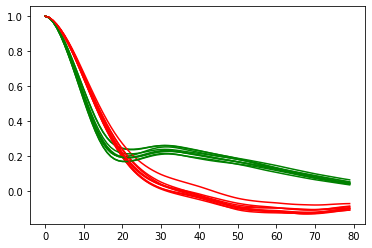

In [19]:
for i in range(0,len(healthylist)):
    plt.plot(lags,healthylist[i],color='green')
    plt.plot(lags,unhealthylist[i],color='red')